<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/Prompt_engineering/Design_prompts_for_Deepseek_Phi3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Design Prompts for DeepSeek running model Ollama

# What is Chain-of-Thought Prompting?
Chain-of-Thought (CoT) Prompting1
Wei, J., Wang, X., Schuurmans, D., Bosma, M., Ichter, B., Xia, F., Chi, E., Le, Q., & Zhou, D. (2022). Chain of Thought Prompting Elicits Reasoning in Large Language Models.

 is a technique that enhances the reasoning capabilities of large language models (LLMs) by incorporating logical steps—or a “chain of thought”—within the prompt. Unlike direct-answer prompting, CoT guides the model to work through intermediate reasoning steps, making it more adept at solving complex tasks like math problems, commonsense reasoning, and symbolic manipulation.

https://learnprompting.org/docs/intermediate/chain_of_thought?srsltid=AfmBOopF2dqW0Bjr1wbo81YJ8Xns1Y00AZIKK48ECt40YpUCTo8wMTO_


# What is OLLAMA
Ollama is a free, open-source tool that allows users to run large language models (LLMs) locally on their computers. Ollama is designed to make it easier for AI practitioners to use LLMs, and to provide more control and security over their data

# DeepSeek 1.5 Billions

https://github.com/deepseek-ai/DeepSeek-R1/blob/main/DeepSeek_R1.pdf

We introduce our first-generation reasoning models, DeepSeek-R1-Zero and DeepSeek-R1. DeepSeek-R1-Zero, a model trained via large-scale reinforcement learning (RL) without supervised fine-tuning (SFT) as a preliminary step, demonstrated remarkable performance on reasoning. With RL, DeepSeek-R1-Zero naturally emerged with numerous powerful and interesting reasoning behaviors. However, DeepSeek-R1-Zero encounters challenges such as endless repetition, poor readability, and language mixing. To address these issues and further enhance reasoning performance, we introduce DeepSeek-R1, which incorporates cold-start data before RL. DeepSeek-R1 achieves performance comparable to OpenAI-o1 across math, code, and reasoning tasks. To support the research community, we have open-sourced DeepSeek-R1-Zero, DeepSeek-R1, and six dense models distilled from DeepSeek-R1 based on Llama and Qwen. DeepSeek-R1-Distill-Qwen-32B outperforms OpenAI-o1-mini across various benchmarks, achieving new state-of-the-art results for dense models.

# Templates Llama

https://github.com/meta-llama/llama-models/blob/main/models/llama3_2/text_prompt_format.md

# Templates Phi3
https://huggingface.co/microsoft/Phi-3.5-mini-instruct


# Templates DeepSeek

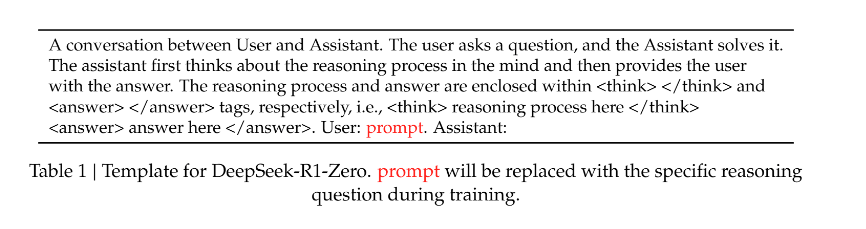https://gist.github.com/bigsnarfdude

# Install Ollama
- curl https://ollama.ai/install.sh | sh

- Run server with: ollama serve &

- Pull model: ollama pull phi3.5
- ollama pull deepseek-r1:1.5b

In [1]:
%%capture --no-stderr
%pip install --quiet -U langgraph langchain_openai langchain_community langchain_core langchain-ollama "ollama==0.4.2"

In [3]:

from langchain_ollama import ChatOllama
from langchain_core.messages import AIMessage

In [17]:
class PromptTemplate:
    def __init__(self):
        self.base_template = """A conversation between User and Assistant. The user asks a question, and the Assistant solves it.
The assistant first thinks about the reasoning process in the mind and then provides the user with the answer.
The reasoning process and answer are enclosed within <think> </think> and <answer> </answer> tags, respectively.

User: {question}
Assistant: {think_tag}
{reasoning}
{think_end_tag}
{answer_tag}
{solution}
{answer_end_tag}
"""

    def generate_math_prompt(self, question):
        """Generate a prompt for mathematical problems"""
        return self.base_template.format(
            question=question,
            think_tag="<think>",
            reasoning="""1. First, let's understand what the question is asking
2. Break down the mathematical components
3. Apply relevant mathematical rules
4. Calculate step by step
5. Verify the result""",
            think_end_tag="</think>",
            answer_tag="<answer>",
            solution="[Mathematical solution will be provided here]",
            answer_end_tag="</answer>"
        )

    def generate_code_prompt(self, question):
        """Generate a prompt for coding problems"""
        return self.base_template.format(
            question=question,
            think_tag="<think>",
            reasoning="""1. Analyze the programming requirements
2. Consider edge cases and constraints
3. Plan the algorithm structure
4. Think about time and space complexity
5. Consider test cases""",
            think_end_tag="</think>",
            answer_tag="<answer>",
            solution="[Code solution will be provided here]",
            answer_end_tag="</answer>"
        )
    def generate_reasoning_prompt(self, question):
        """Generate a prompt for solving reasoning problems"""
        return self.base_template.format(
            question=question,
            think_tag="<think>",
            reasoning="""1. Analyze the question and identify the reasoning process
2. Break down the reasoning components
3. Apply relevant reasoning rules
4. Calculate step by step
5. Verify the result""",
            think_end_tag="</think>",
            answer_tag="<answer>",
            solution="[the solution will be provided here]",
            answer_end_tag="</answer>"
        )

In [39]:
llm = ChatOllama(
    model="deepseek-r1:1.5b",
    temperature=.0,
    num_ctx=1600,

)

In [40]:
template = PromptTemplate()

In [28]:
# Example 1: Math Problem
math_question = "Calculate the area of a circle with radius 5 units."
math_prompt = template.generate_math_prompt(math_question)
print("Math Problem Template:")
print("-" * 50)
print(math_prompt)
print("\n")

Math Problem Template:
--------------------------------------------------
A conversation between User and Assistant. The user asks a question, and the Assistant solves it.
The assistant first thinks about the reasoning process in the mind and then provides the user with the answer.
The reasoning process and answer are enclosed within <think> </think> and <answer> </answer> tags, respectively.

User: Calculate the area of a circle with radius 5 units.
Assistant: <think>
1. First, let's understand what the question is asking
2. Break down the mathematical components
3. Apply relevant mathematical rules
4. Calculate step by step
5. Verify the result
</think>
<answer>
[Mathematical solution will be provided here]
</answer>





In [22]:

ai_msg = llm.invoke(math_prompt)

print(ai_msg.content)
print("-"*100)

<think>
Alright, so I need to calculate the area of a circle with a radius of 5 units. Hmm, okay, let's start by recalling what I know about circles and their properties.

First, I remember that the area of a circle is calculated using the formula:

\[ \text{Area} = \pi r^2 \]

Where \( r \) is the radius of the circle. In this case, the radius (\( r \)) is given as 5 units.

So, plugging in the value of the radius into the formula:

\[ \text{Area} = \pi \times (5)^2 \]
\[ \text{Area} = \pi \times 25 \]
\[ \text{Area} = 25\pi \]

Therefore, the area of the circle with a radius of 5 units is \( 25\pi \) square units.
</think>

Sure! Let's calculate the area of a circle with a radius of 5 units step by step.

### Step 1: Recall the Formula for the Area of a Circle
The formula to find the area (\( A \)) of a circle when you know its radius (\( r \)) is:

\[ A = \pi r^2 \]

### Step 2: Plug in the Given Radius
We are given that the radius (\( r \)) is 5 units. Plugging this into the formul

In [23]:
code_question = "Write a function to find the factorial of a number."
code_prompt = template.generate_code_prompt(code_question)

ai_msg = llm.invoke(code_prompt)

print(ai_msg.content)
print("-"*100)

<think>

<answer>
To write a function to find the factorial of a number, we can follow these steps:

1. **Understand the Problem**: The factorial of a non-negative integer \( n \) is the product of all positive integers less than or equal to \( n \). It's denoted by \( n! \).

2. **Define the Function**: Create a function called `factorial` that takes an integer as input and returns its factorial.

3. **Handle Edge Cases**:
   - If the input is 0, return 1 because \( 0! = 1 \).
   - If the input is negative, return 0 or handle it according to the problem's requirements.

4. **Implement the Algorithm**:
   - Initialize a variable `result` to 1.
   - Loop from 1 to the given number:
     - Multiply `result` by the current loop index.
   - Return `result`.

5. **Test Cases**: Test the function with known values like \( 0! = 1 \), \( 3! = 6 \), and \( 5! = 120 \).

Here's a Python implementation of the factorial function:

```python
def factorial(n):
    if n < 0:
        return 0
    resu

In [24]:

p1 = """

In this task, you are given an input list A. You need to find all the elements of the list that are numbers and calculate their sum.
Consider the posibility of having negative numbers

['i', 'P', 'h', '849', 'e', '3' ]

How much number sum up?
"""
p2= """
I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman.
Then I went again and bought 5 more apples and I ate 1 apple.

How many apples did I remain with?
"""

p3 = """

When I was 6, my sister was half of my age. Now I’m 70 years old.
how old is my sister now?

"""

p4 = """

Question: I had a car 20 years ago and at that time I was 37.
How old I am now?
"""

p5 = """

I had a car 20 years ago, and its cost was 100000$. Car's anual depreciation it is 5%.
using the Percentage (Declining Balance) method
How much is the value of the car now?
"""

p6 = """

Which is a faster way to get to work?
Option 1: Take a 1000 minute bus, then a half hour train, and finally a 10 minute bike ride.
Option 2: Take an 800 minute bus, then an hour train, and finally a 30 minute bike ride.

"""

prompts =  [p1, p2, p3, p4, p5, p6]


# Solutions
### p1
852
### P2
10 Apples
### P3
67 years
### P4
57 years
### P5
35849 Dollars
### P6
Option 1 will take 1000+30+10 = 1040 minutes. Option 2 will take 800+60+30 = 890 minutes. Since Option 2 takes 890 minutes and Option 1 takes 1040 minutes, Option 2 is faster.

In [41]:
for p in prompts:
    reasoning_prompt = template.generate_reasoning_prompt(p)

    ai_msg = llm.invoke(reasoning_prompt)

    print(ai_msg.content)
    print("-"*100)


<think>
Alright, let's tackle this problem together. So, I have a list of elements: ['i', 'P', 'h', '849', 'e', '3']. The task is to find all the elements that are numbers and calculate their sum. Hmm, okay, first things first, I need to understand what qualifies as a number in this context.

Looking at the list, some of the elements are strings like 'i', 'P', 'h', 'e', and single-digit numbers like 849 and 3. The problem mentions considering negative numbers, so I should also check if any of these elements might be negative. 

Let's go through each element one by one:
- 'i' is a string.
- 'P' is also a string.
- 'h' is another string.
- '849' is a number.
- 'e' is a string.
- '3' is a single-digit number.

So, the numbers in this list are 849 and 3. Now, I need to calculate their sum. Adding them together: 849 + 3 equals 852.

Wait, did I miss anything? Let me double-check. Are there any other elements that might be considered numbers? The strings don't count as numbers, so nope. And 

In [30]:
class Phi3_PromptTemplate:
    def __init__(self):
        self.base_template = """{system_start}You are a clever chatbot specialized in answerings Maths, logic and reasoning questions.
        Stick to the question and provide only the answer and no more. I dont need explanations, neither intermediary steps.
        Let's think step by step.
        Intructions to solve the problem:
        {reasoning}
        Output:
        The format of the output should be:
        {solution}
        {system_ends}{start_user}{question}{end_user}{assistant_tag}

"""


    def generate_reasoning_prompt(self, question):
        """Generate a prompt for solving reasoning problems"""
        return self.base_template.format(
            question=question,
            system_start="<|system|>",
            system_ends="<|end|>",
            reasoning="""1. Analyze the question and identify the reasoning process
2. Break down the reasoning components
3. Apply relevant reasoning rules
4. Calculate step by step
5. Verify the result""",
            start_user="<|user|>",
            end_user="<|end|>",
            solution="[the solution will be provided here]",
            assistant_tag="<|assistant|>"
        )

In [31]:
template_phi = Phi3_PromptTemplate()

In [32]:
reasoning_prompt = template_phi.generate_reasoning_prompt(p1)
print("Reasoning Problem Template:")
print("-" * 50)
print(reasoning_prompt)
print("\n")

Reasoning Problem Template:
--------------------------------------------------
<|system|>You are a clever chatbot specialized in answerings Maths, logic and reasoning questions. 
        Stick to the question and provide only the answer and no more. I dont need explanations, neither intermediary steps. 
        Let's think step by step.
        Intructions to solve the problem:
        1. Analyze the question and identify the reasoning process
2. Break down the reasoning components
3. Apply relevant reasoning rules
4. Calculate step by step
5. Verify the result
        Output:
        The format of the output should be:    
        [the solution will be provided here]
        <|end|><|user|>

In this task, you are given an input list A. You need to find all the elements of the list that are numbers and calculate their sum.
Consider the posibility of having negative numbers

['i', 'P', 'h', '849', 'e', '3' ]

How much number sum up?
<|end|><|assistant|>






In [ ]:


for p in prompts:
  llmphi3 = ChatOllama(
    model="phi3.5:3.8b",
    temperature=.4,
    num_ctx=4096,
)

  reasoning_prompt = template_phi.generate_reasoning_prompt(p)

  ai_msg = llmphi3.invoke(reasoning_prompt)

  print(ai_msg.content)
  print("-"*100)

In [38]:
for p in prompts:
  llmphi3 = ChatOllama(
    model="phi3.5:3.8b",
    temperature=.4,
    num_ctx=4096,
)

  reasoning_prompt = template_phi.generate_reasoning_prompt(p)

  ai_msg = llmphi3.invoke(p)

  print(ai_msg.content)
  print("-"*100)

To solve this task, we will iterate through each element in list A and check if it is a numeric value (integer or float). If an item qualifies as a number, which includes both positive numbers like `849` and negative ones such as `-3`, then add them to our sum. Here's how you can do this:

1. Initialize the total_sum variable with 0; it will hold all numeric values from list A once they are identified.
2. Loop through each element in List A using a for loop or similar iteration method available in your programming language of choice (e.g., Python, JavaScript).
3. For every item:
   - Check if the current string can be converted to an integer without raising any exceptions like `ValueError`. This is typically done by trying parseInt() function with base 10 or using a regular expression that only matches digits and signs (e.g., `/^-?\d+$/`). If this check passes, then it's safe to assume the item can be treated as an integer number for our purposes here since we are not dealing with floa